In [1]:
import libs.append_path
from add_python_libraries import *
import pd_filter_fcns
import libs.mosfet_hs_dcm as mosfet_hs
import math
import numpy as np
import pandas as pd

In [2]:
partnum = 'SISH536DN'
fet_params = mosfet_hs.get_fet_params(partnum)
def fet_cap(vds):
    return mosfet_hs.Fet_cap_vs_vds(fet_params,vds)
fetcapobj = fet_cap(12)
def ciss(vds):
    return fetcapobj.ciss(vds)
def coss(vds):
    return fetcapobj.coss(vds)
def crss(vds):
    return fetcapobj.crss(vds)
fetcapdict = {'ciss':{v:ciss(v) for v in range(1,31)},
          'coss':{v:coss(v) for v in range(1,31)},
          'crss':{v:crss(v) for v in range(1,31)}}

In [3]:
df = pd.DataFrame.from_dict(fetcapdict)
df=df*1e12

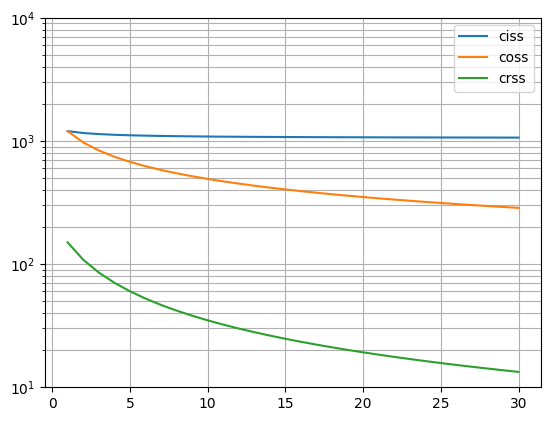

In [4]:
ax = df.plot(logy=True, grid=True, ylim = (10,10000))
ax.yaxis.grid(True, which='minor')